In [1]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from src.physics.pulses import GaussianPulse1D, format_value
from src.physics.crystals import KTPCrystal, KTPCrystal_Kato
from src.physics.nonlinear_optics import PhaseMatching
from src.physics.math import conv_discrete

# Pasos para generar la simulacion

1. Definir el pulso
2. Definir el cristal
3. Calcular la fase de emparejamiento (phase matching)
4. Calcular la funcion de mismatch (mismatching function)
5. Calcular convolucion del pulso de entrada
6. REalizar el producto de la funcion de mismatch, la autoconvolucion y el factor de amplitud. (Parametros definidos con anterioridad)

# Parametros inicales del pulso de entrada


In [4]:
# Cavity parameters
L = 4e-3  #  cavity length (m) | 4 mm

# Gaussian input pulse parameters
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength FWHM
fundamental_wavelength = 795e-9    # (m) central wavelenght
fundamental_wavelength_um = fundamental_wavelength * 1e6  # (um) | 0.795 um

input_pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=input_width_wl, steps=500)
wavelenght, A_wavelenght = input_pulse.generate_pulse(normalization=True)
sigma_wavelength = input_pulse.standard_deviation()  # (m) | 1.87e-08 m


# --------------- Parameters in frequency ---------------
c = 299792458  # (m/s)
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

input_pulse_omega = GaussianPulse1D(x0=fundamental_frequency, steps=10000, std=sigma_frequency, times_std=8)
frequencies, A_omega = input_pulse_omega.generate_pulse(normalization=True)
frequencies, I_omega = input_pulse_omega.generate_intensity(normalization=True)

# --------------- SHG parameters ---------------
SHG_frequencies = 2 * frequencies  # Second harmonic frequencies
SHG_wavelength = fundamental_wavelength / 2  # Second harmonic wavelength (m)
SHG_wavelength_um = SHG_wavelength * 1e6  # Second harmonic wavelength (um) | 0.3975 um

print("Parameters of the Gaussian pulse in wavelength domain:")
print("-"*60)
# Obtener el diccionario con los parámetros del pulso
pulse_dict = input_pulse.as_dict()
for key, value in pulse_dict.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")
    
print("\n")
print("Parameters of the Gaussian pulse in frequency domain:")
print("-"*60)
# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_omega.as_dict()
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

Parameters of the Gaussian pulse in wavelength domain:
------------------------------------------------------------
Center: 7.95e-07
Fwhm: 4.40e-08
Sigma: 1.87e-08
Steps: 500
Times Std: 5
Computed Fwhm: 4.38e-08


Parameters of the Gaussian pulse in frequency domain:
------------------------------------------------------------
Center: 2.37e+15
Fwhm: None
Sigma: 5.57e+13
Steps: 10000
Times Std: 8
Computed Fwhm: 1.31e+14


Text(0.8, 0.75, 'FWHM = 44 nm')

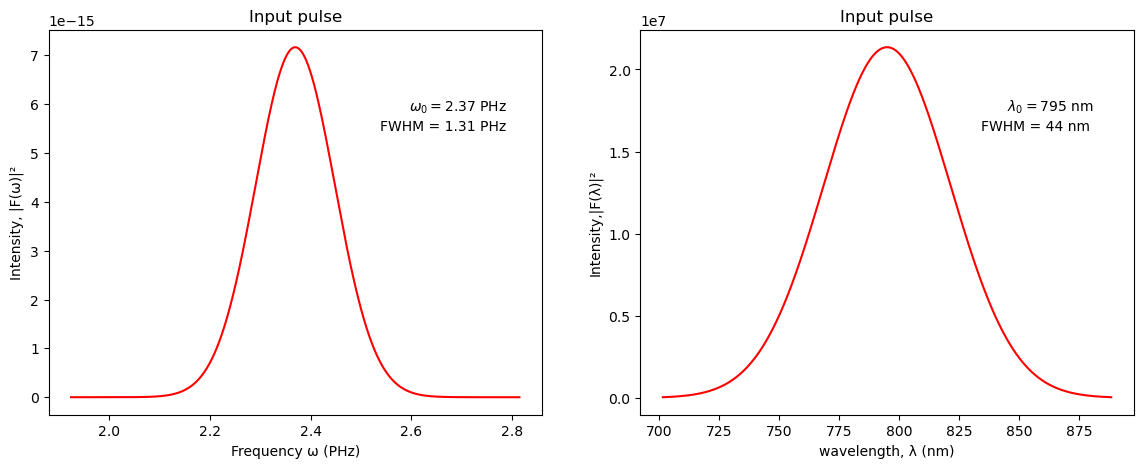

In [6]:
fig0, axs0 = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica (a): Pulso de entrada vs omega
axs0[0].plot(frequencies*1e-15, A_omega, color='red', linestyle='-')
axs0[0].set_ylabel('Intensity, |F(ω)|²')
axs0[0].set_xlabel('Frequency ω (PHz)')
axs0[0].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs0[0].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs0[0].transAxes, fontsize=10)
axs0[0].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs0[0].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs longitud de onda
axs0[1].plot(wavelenght*1e9, A_wavelenght, color='red', linestyle='-')
axs0[1].set_ylabel('Intensity,|F(λ)|²')
axs0[1].set_xlabel('wavelength, λ (nm)')
axs0[1].set_title('Input pulse')

# Agregar texto en la gráfica (b)
axs0[1].text(0.83, 0.8, r"$\lambda_0 = 795$ nm", ha='center', va='center', transform=axs0[1].transAxes, fontsize=10)
axs0[1].text(0.8, 0.75, r"FWHM = 44 nm", ha='center', va='center', transform=axs0[1].transAxes, fontsize=10)